<a href="https://colab.research.google.com/github/Schrodingercat-tech/Note-Book/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from collections import defaultdict,Counter
from typing import List,Tuple
import itertools

In [41]:
classes = defaultdict(str)
iris = load_iris()
featuresData = iris.data
featuresNames = iris.feature_names
df = pd.DataFrame(data=featuresData,columns=featuresNames)
df['species'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [42]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
for index,species  in enumerate(['iris setosa','iris virsicolor','iris virginica']):
    classes[index] = species


In [44]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [45]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [46]:
class_palette = {0:'red',1:'blue',2:'green'}

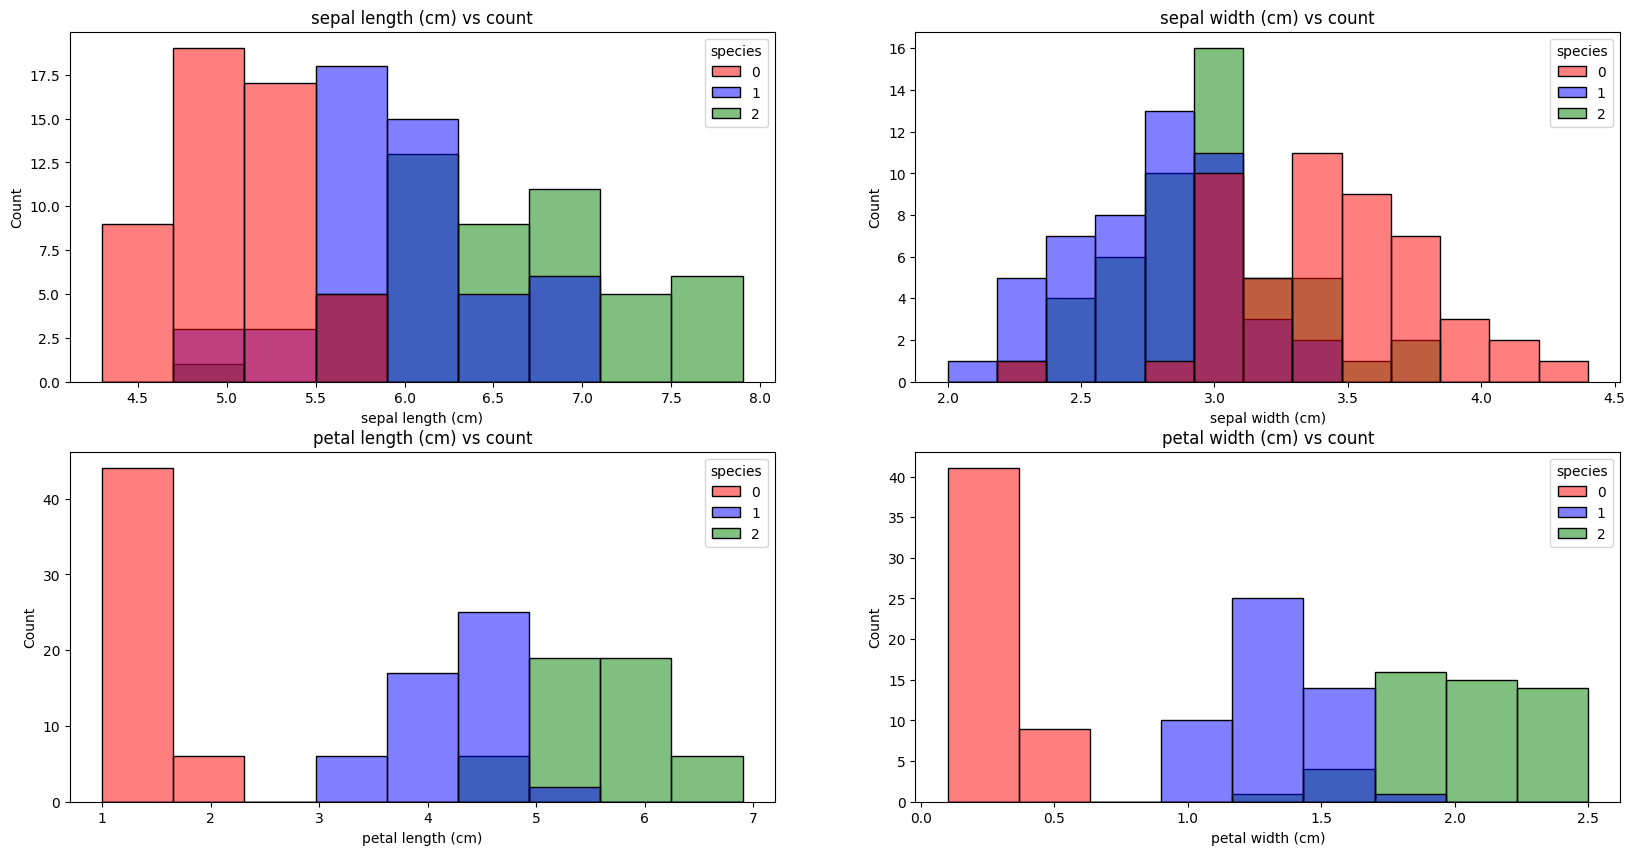

In [47]:
def subplotHist(data:pd.core.frame.DataFrame,features : List[str], shape : Tuple[int],class_palette : defaultdict(str)=None,classes:str = None)->None:
    assert len(shape)==2, 'shape must be of two dimention row , col'
    m,n = shape
    fig,ax = plt.subplots(m,n,figsize=(20,10))
    subax = [(i,j) for i in range(m)for j in range(n)]
    for (i,j),name in zip(subax,features):
        sns.histplot(ax=ax[i,j],data=data,x=data[name],hue=classes,palette=class_palette)
        ax[i,j].set_title(f'{name} vs count')
    plt.show()

subplotHist(data=df,features=featuresNames,shape=(2,2),classes='species',class_palette=class_palette)

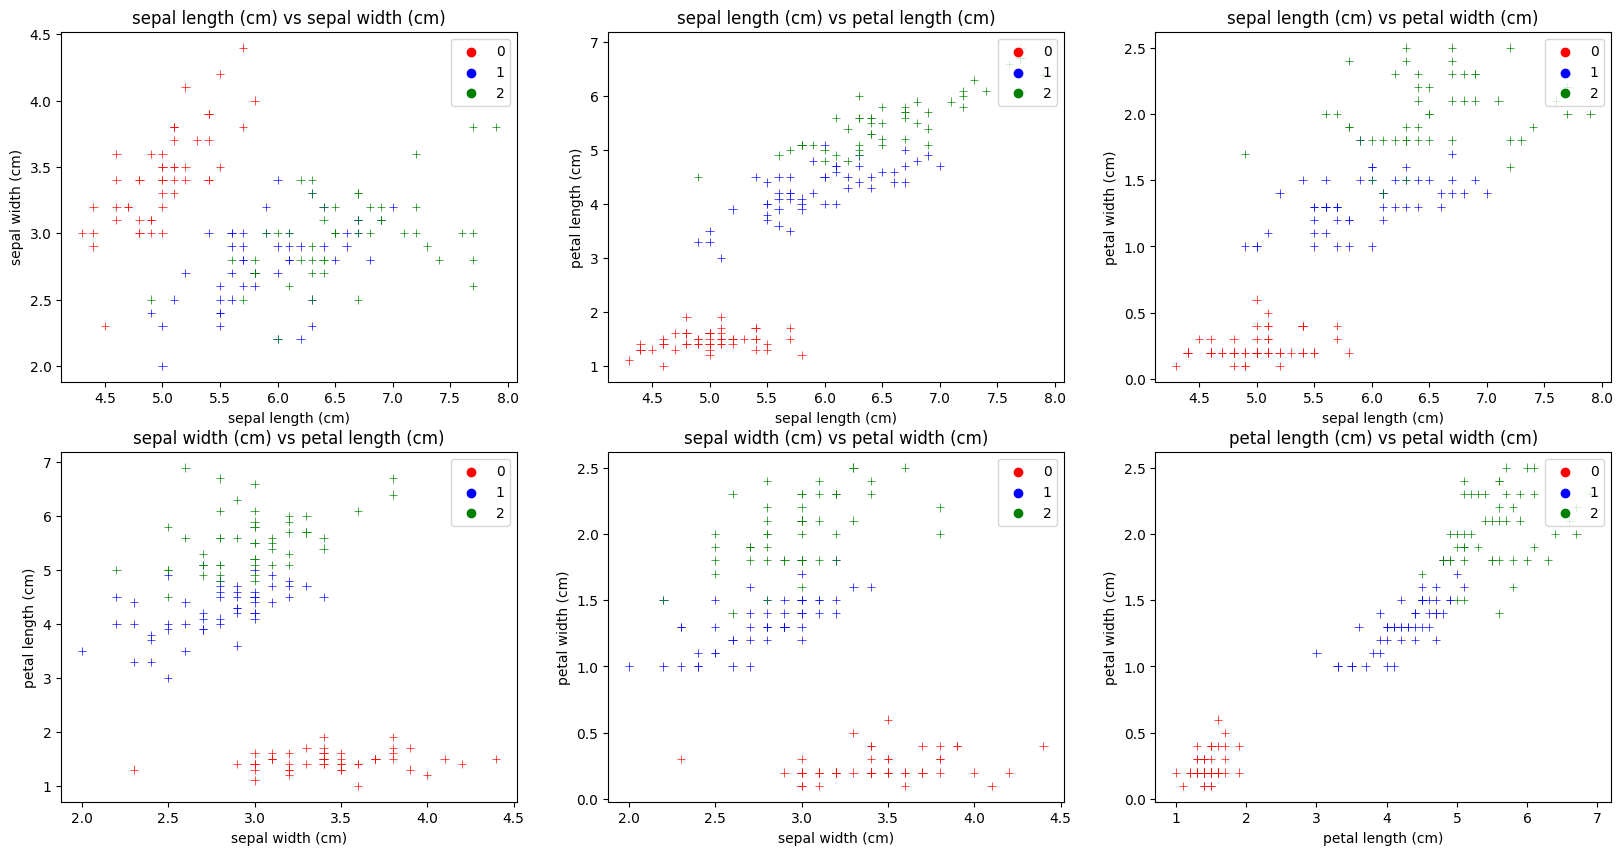

In [48]:
class_color = defaultdict(str)

def subplots(data:pd.core.frame.DataFrame,features : List[str], shape : Tuple[int],target:str,class_palette : defaultdict(str)=None)->None:

    assert len(shape)==2, 'shape must be of two dimention row , col'
    m,n = shape
    fig,ax = plt.subplots(m,n,figsize=(20,10))
    combinations = [ x for x in itertools.combinations(features,2)]
    comLen = len(combinations)
    assert  m*n>= comLen , 'the shape you provided does not fit all the subplots'
    assert (m**2 if m>n else n**2) > m*n,'dont create unnecessary  subplots'
    subax = [(i,j) for i in range(m)for j in range(n)]
    for (i,j) , (fx,fy) in zip(subax,combinations):
        sns.scatterplot(ax=ax[i,j],data=data,x=data[fx],y=data[fy],hue=target,palette=class_palette,marker='+')
        ax[i,j].legend(loc='upper right')
        ax[i,j].set_title(f'{fx} vs {fy}')
    plt.show()

subplots(data=df,features=iris.feature_names,shape=(2,3),target='species',class_palette=class_palette)

A correlation matrix represents how two variables, like <strong style='color:red;'>A</strong> and <strong style='color:red;'>B</strong> influence each other either positively or negatively. If <strong style='color:red;'>A</strong> and <strong style='color:red;'>B</strong> tend to increase or decrease together, it's called a  <strong style='color:yellow;'>positive correlation</strong>. On the other hand, if one goes up while the other goes down, it's termed a <strong style='color:yellow;'>negative correlation</strong>. This matrix helps us understand the strength and nature of their relationship so these values ranges from -1 to 1

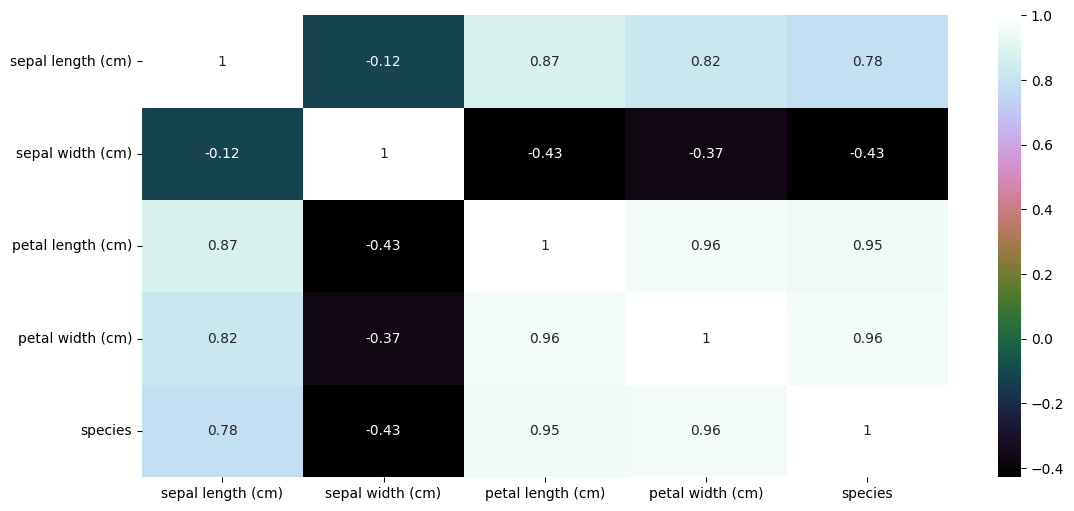

In [49]:
corelation_matrix = df.corr()
fig,ax = plt.subplots(figsize=(13,6))
sns.heatmap(corelation_matrix,annot=True,ax=ax,cmap='cubehelix')
plt.show()

Model Training

In [50]:
x = df[featuresNames]
y = df['species']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=400 ,test_size=.3)
# knn Model
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(xtrain,ytrain)
knn_model.score(xtest,ytest)

0.9777777777777777

In [51]:
yhat = knn_model.predict(xtest)

now lets see how these feature vector distributed where the vector giving wrong prediction

In [56]:
def getAllWrongPrediction():
  """the wrong prediction be like class tuple
    (correctClass,wrongClass)  as key : [List[float]] and all the feature vector as list
    example : {(correctClass,wrongClass):[v1,v2,v3..]}
  """
  classVector = defaultdict(list)
  for trueclass , predictedclass ,vector in zip(ytest,yhat,xtest.to_numpy()):
    if trueclass!=predictedclass:
      classVector[(trueclass,predictedclass)].append(vector)
  return classVector

getAllWrongPrediction()

defaultdict(list, {(2, 1): [array([4.9, 2.5, 4.5, 1.7])]})